In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [143]:
df=pd.read_csv('/content/AirPassengers (2).csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [144]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [145]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [146]:
df['Month']=pd.to_datetime(df['Month'])
df.index=df['Month']
df['Month']
del df['Month']

# Converting the Month column entires into a date time format
# Creating a new column with the samne name 'Month' and removing the older version of the same column

In [147]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

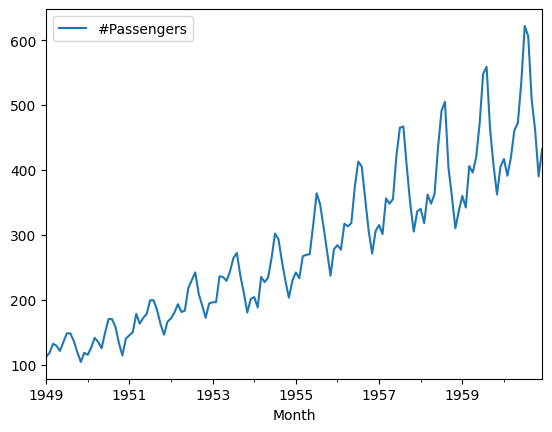

In [148]:
df.plot()

In [149]:
# I.

# Conversion of non-stationary data into a stationary is done by the removal of noise from time series data

In [150]:
mean_log=df.rolling(window=12).mean() # Rolling Mean Method
std_log=df.rolling(window=12).std()   # Rolling std. dev method

Text(0.5, 1.0, 'Comparison of Time Series Data')

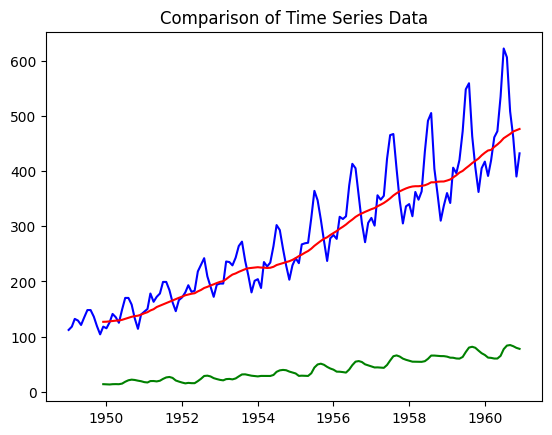

In [151]:
plt.plot(df,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [152]:
# II. ADFuller Test
# checking the stationarity of the time series data
# adfuller - Augmented Dickey Fuller

In [153]:
from statsmodels.tsa.stattools import adfuller

In [154]:
result=adfuller(df['#Passengers'])
print(result)

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


<Axes: xlabel='Month'>

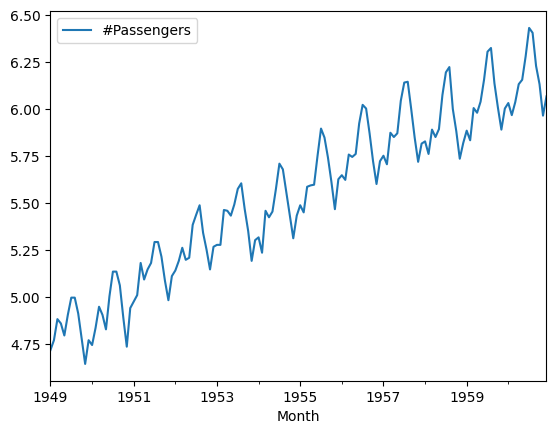

In [155]:
# III.
# Log-Transformation Method of converting the non stationary data into stationary data

first_log=np.log(df)
first_log=first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Comparison of Time Series Data')

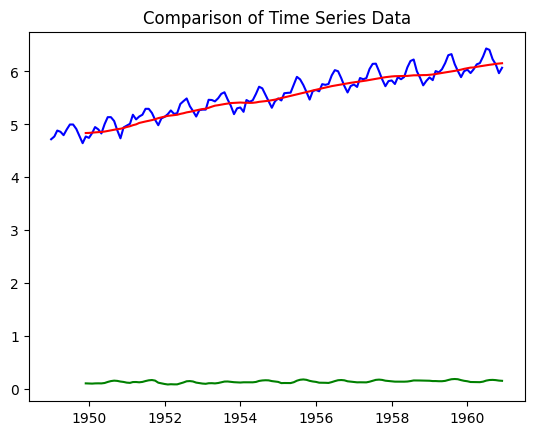

In [156]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

plt.plot(first_log,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [157]:
from statsmodels.tsa.stattools import adfuller
result3=adfuller(first_log['#Passengers'])
print(result3)

(-1.7170170891069683, 0.4223667747703874, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)


<Axes: xlabel='Month'>

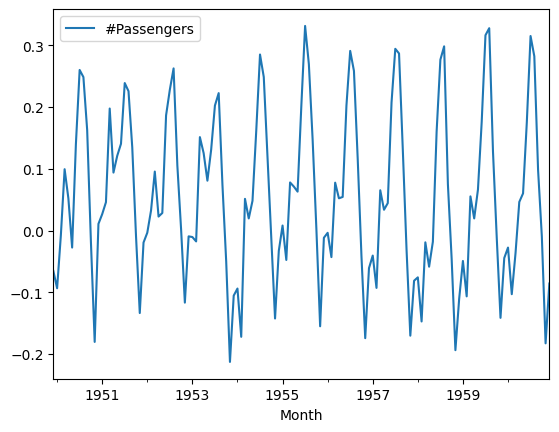

In [158]:
# first_log is the variable giving the plot for the original time series data after normalizaing it using log method
# mean_log to check the stationarity
# first_log and mean_log difference

new_data=first_log-mean_log
new_data=new_data.dropna()
new_data.plot()

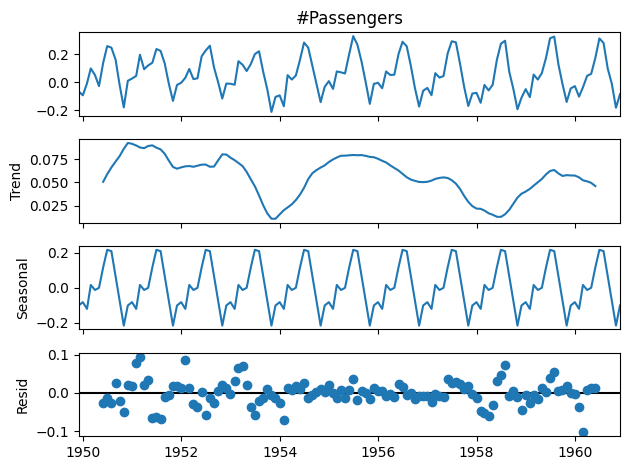

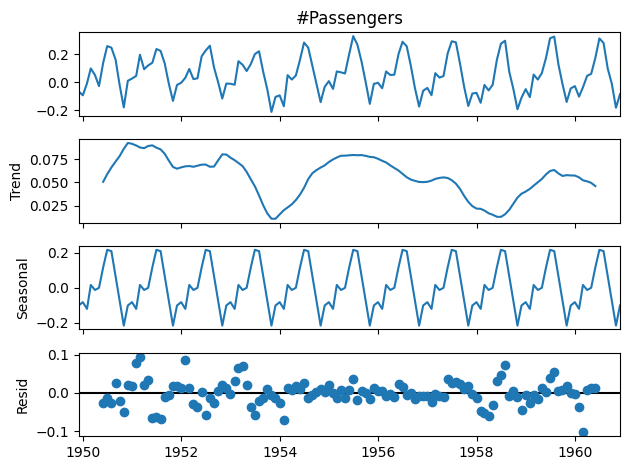

In [159]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(new_data['#Passengers'].dropna())
decompose_result.plot()

In [160]:
# p - past data (AR- Auto Regression) / measures the correlation between a time series and its own lagged values
# d - differencing (I - Integration) / will be number of time we taken difference
# q - error (MA - Moving Average) / identify the direct relationship between observations at different lags while removing the indirect effects of shorter lags

# p - autocorrelation (acf)
# q - partial autocorrelation (pacf)

In [161]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [162]:
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)

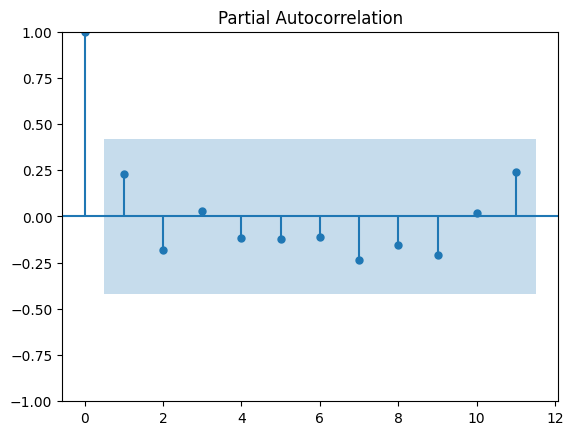

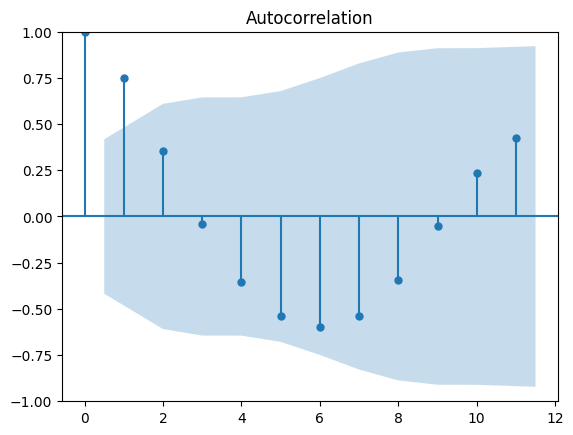

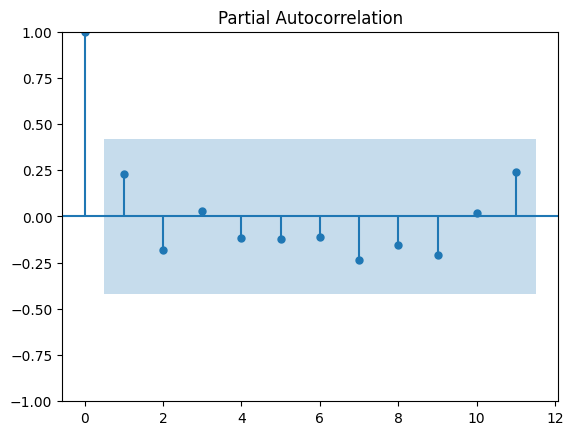

In [163]:
plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [164]:
# value of p is the value on x axis decided by the first positive plot lying in the confidence interval (output from y axis)
# value of d is the number of times differences as calculated to make the time series data stationary
# value of q is the value on x axis decided by the first negative plot  (output from x axis)

In [165]:
# Model Building

In [166]:
train=new_data.iloc[:120]['#Passengers']
test=new_data.iloc[121:]['#Passengers']

In [167]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train,order=(1,0,2))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [168]:
model

<Axes: xlabel='Month'>

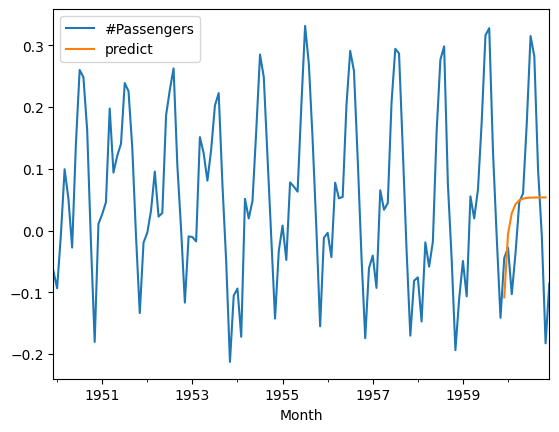

In [169]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

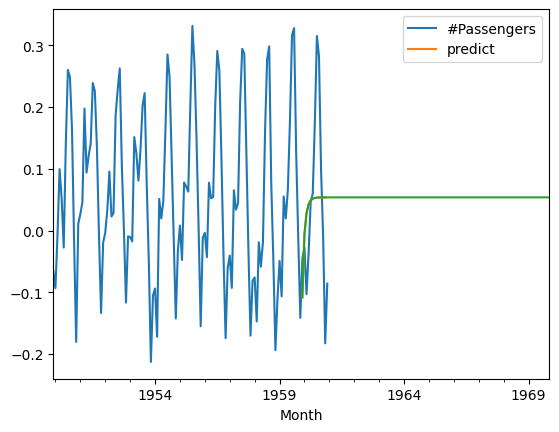

In [170]:
forecast=model.forecast(steps=120)
new_data.plot()
forecast.plot()

In [171]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [172]:
model

<Axes: xlabel='Month'>

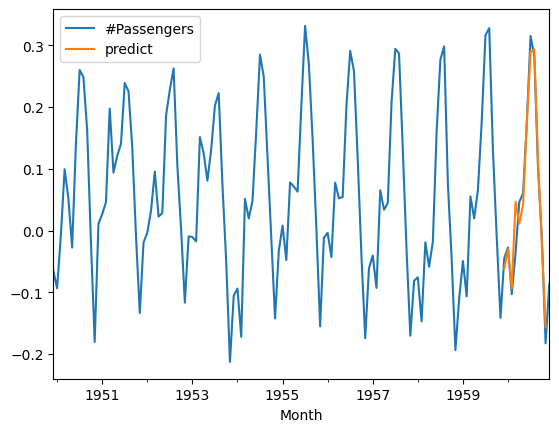

In [173]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

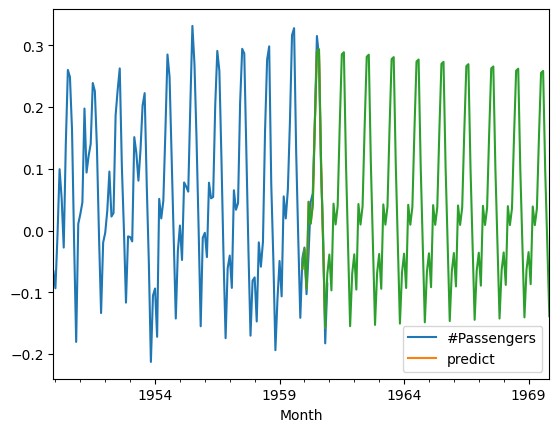

In [174]:
forecast=model.forecast(steps=120)
new_data.plot()
forecast.plot()